In [1]:
import pandas as pd
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [2]:
genres_list = []
seen_genres = set()
num = 0
for index, row in read_data.iterrows():
    try:
        splited_word = row["genres"].split()
        for i in splited_word:
            if i not in seen_genres:
                genres_list.append(i)
                seen_genres.add(i)        
    except:
        num = num + 1               
print(f"Number of movies without a genre {num}")


Number of movies without a genre 28


In [3]:
x_axis = np.arange(len(genres_list))
tick_locations = [value+0.4 for value in x_axis]
count_dict = {}
def count(gen, cnt):
    for index, row in read_data.iterrows():
        try:
            splited_word = row["genres"].split()
            for i in splited_word:
                if gen == i:
                    cnt = cnt + 1        
        except:
        
            pass
    
    return cnt

for genre in genres_list:
    count_dict[genre]=count(genre, 0)
count_dict


{'Action': 1029,
 'Adventure': 714,
 'Fantasy': 356,
 'Science-Fiction': 476,
 'Crime': 593,
 'Drama': 1875,
 'Thriller': 1073,
 'Animation': 207,
 'Family': 426,
 'Western': 66,
 'Comedy': 1386,
 'Romance': 731,
 'Horror': 418,
 'Mystery': 295,
 'History': 166,
 'War': 132,
 'Music': 143,
 'Documentary': 96,
 'Foreign': 34,
 'TV-Movie': 5}

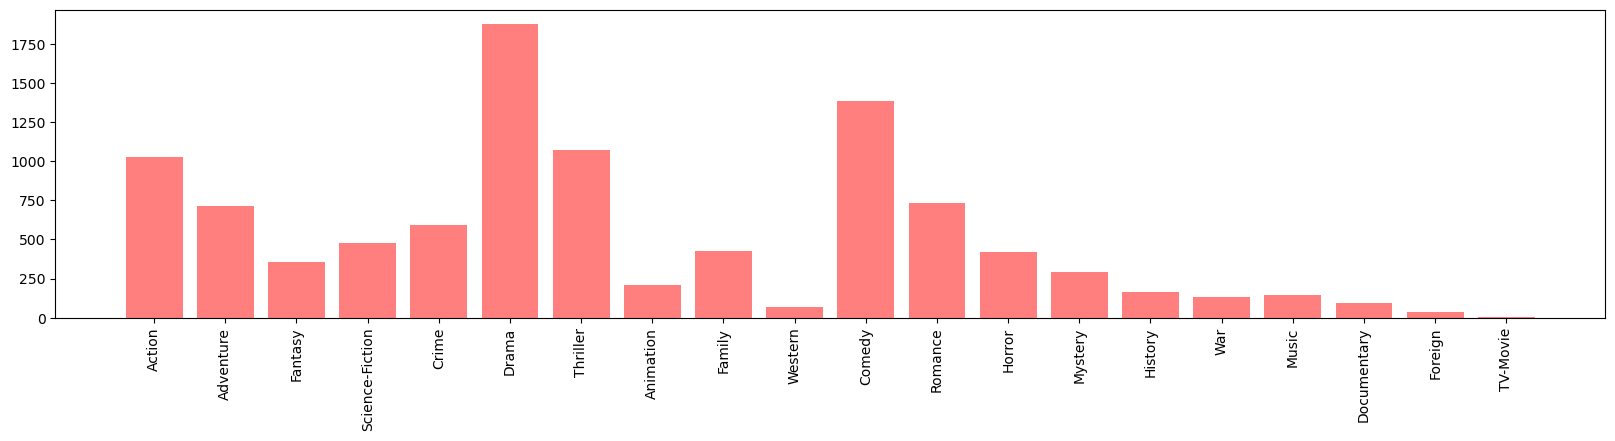

In [4]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, count_dict.values(), color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, count_dict.keys(), rotation="vertical")
plt.show()
    